In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

**CRIM:** Per capita crime rate by town <br>
**ZN:** Proportion of residential land zoned for lots over 25,000 sq. ft <br>
**INDUS:** Proportion of non-retail business acres per town <br>
**CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
**NOX:** Nitric oxide concentration (parts per 10 million) <br>
**RM:** Average number of rooms per dwelling <br>
**AGE:** Proportion of owner-occupied units built prior to 1940 <br>
**DIS:** Weighted distances to five Boston employment centers <br>
**RAD:** Index of accessibility to radial highways <br>
**TAX:** Full-value property tax rate per \$10,000 <br>
**PTRATIO:** Pupil-teacher ratio by town <br>
**B:** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br>
**LSTAT:** Percentage of lower status of the population <br>


In [2]:
# Importing Data 
from sklearn.datasets import load_boston 
boston_data = load_boston() 

In [3]:
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Now we'll add price column
boston['Price'] = boston_data.target
boston.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# splitting data to training and testing dataset

# Input Data 
x = boston_data.data 
   
# Output Data 
y = boston_data.target 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [8]:
# Fitting Multi Linear regression model to training model 
lr = LinearRegression() 
lr.fit(xtrain, ytrain)

# predicting the test set results 
y_pred = lr.predict(xtest) 

In [9]:
# Results of Linear Regression. 

from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R squared error', r2_score(ytest, y_pred))

Mean Absolute Error :  3.8429092204444983
Mean Square Error :  33.44897999767656
RMSE 5.783509315085138
R squared error 0.5892223849182504


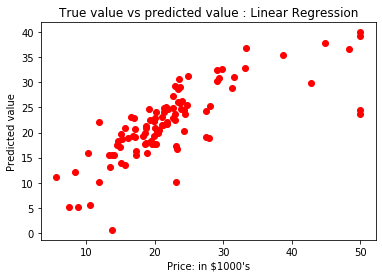

In [10]:
plt.scatter(ytest, y_pred, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

# Now Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.3)
clf.fit(xtrain, ytrain)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
#coefficient
clf.coef_

array([-1.18257051e-01,  4.52965149e-02, -7.60092263e-03,  2.32506112e+00,
       -1.27414080e+01,  3.73464968e+00, -6.42498300e-03, -1.33872156e+00,
        2.34050275e-01, -1.12187382e-02, -1.01134861e+00,  8.30085958e-03,
       -4.95119514e-01])

In [13]:
# predicting the test set results 
y_pred2 = clf.predict(xtest) 

print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error', r2_score(ytest, y_pred2))

Mean Absolute Error :  3.833302523389471
Mean Square Error :  33.736190768885855
RMSE 5.808286388332264
R squared error 0.5856952293627944


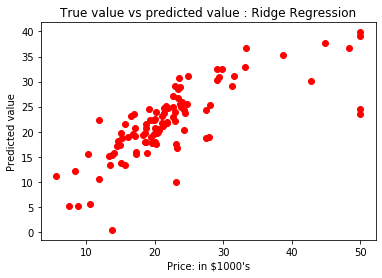

In [14]:
plt.scatter(ytest, y_pred2, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Ridge Regression") 
plt.show() 

# Lasso Regression

In [15]:
from sklearn import linear_model
lso = linear_model.Lasso(alpha=0.001)
lso.fit(xtrain, ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# predicting the test set results 
y_pred2 = lso.predict(xtest) 

print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, y_pred2))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, y_pred2))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, y_pred2)))
print('R squared error', r2_score(ytest, y_pred2))

Mean Absolute Error :  3.841681506908808
Mean Square Error :  33.4790181403956
RMSE 5.786105610891975
R squared error 0.5888534948466109


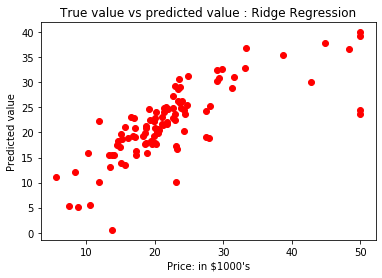

In [17]:
plt.scatter(ytest, y_pred2, c = 'red') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Ridge Regression") 
plt.show()